In [111]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

from MediaDecomposition import ModelSpec, MediaDecomposition, ModelBuildUtils
from Definitions import *

import arviz as az

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Data file

In [2]:
model_data = pd.read_csv('17217_data.csv')
model_data = model_data.fillna(0) 
model_data.head()

,Respondent_Serial,SM_GPID,Pre_Post,yyyymmdd,WEEK,SEX,AGEBANDS,Region,Region2,SEG,...,Noodle_Eaters,tv_fr,onl_fr,tv_onl,bloger,ex2pbp,wom2pbp,mc2pbp,wave,wave1
0,100008,514226cb-13e3-4185-90ac-b88ea6f73c8b,1,20230620,202325,1,2,3,2,6,...,1,3,0,0,0,1,1,0,1.0,1.0
1,100009,3b825e32-315e-475a-a48c-a0cfd4d01db2,1,20230620,202325,2,2,3,2,4,...,1,0,0,0,0,1,1,0,1.0,1.0
2,100011,cd4069b9-a961-4c2d-bc0e-e922db4507f1,1,20230620,202325,1,2,3,2,4,...,1,30,0,0,0,1,1,0,1.0,1.0
3,100012,d98fd1ae-b370-417b-ad5b-3bce01c34095,1,20230620,202325,2,2,3,2,6,...,1,20,0,0,0,1,1,0,1.0,1.0
4,100013,08a7ac20-861e-45ab-9de6-a24459540e5b,1,20230620,202325,2,2,3,2,4,...,1,10,0,0,0,1,0,0,1.0,1.0


# 2. Model Spec

In [5]:
# списки переменных для моделирования

targets = [
'TOM_01', 'TotalUnaided_01', 'COMAW_01', 
'KPIA_01', 'KPIB_01', 'KPIC_01', 'KPID_01', 'KPIE_01', 'KPIF_01', 'KPIH_01', 'KPII_01', 'KPIJ_01', 
'MostOften_01', 'Regular_Buyers_Brand1', 'Tried_01', 'Consideration_TopBox_01', 
'Prompted_BBW', 'MostOften_BBW', 'Regular_BBW', 'Trial_BBW', 'Consideration_Top1_BBW', 
] 

#camp = ['tv_fr', 'onl_fr', 'tv_onl', 'bloger'] 
camp = ['tv_fr', 'onl_fr', 'bloger'] 

#non_camp = ['MC2P', 'WOM2P', 'EX2P']
non_camp = ['ex2pbp','wom2pbp', 'mc2pbp']

rg_vars = ['BB_regular_buyers', 'Noodle_frequent_buyers', 'Noodle_Eaters']

report_splits = ['SEX', 'AGEBANDS',  'Region', 'wave1']

# первая спецификация модели 

model_spec = ModelSpec().FromLists(
    targets=targets, 
    media=camp,
    non_media=non_camp, 
    relevance_groups=None,
    report_splits=report_splits
)

model_spec.ValidateSpecVsData(model_data) 

True

# Contributions 

In [46]:
#targets = ['TOM_01', 'TotalUnaided_01', 'COMAW_01'] 
targets = ['TOM_01', 'COMAW_01'] 
camp = ['tv_fr', 'onl_fr', 'bloger'] 
#camp = ['tv_fr', 'onl_fr', 'tv_onl']
#non_camp = ['ex2pbp','wom2pbp', 'mc2pbp']
non_camp = ['MC2', 'WOM2', 'EX2']
rg_vars = ['Noodle_frequent_buyers', 'Noodle_Eaters']
report_splits = ['SEX', 'AGEBANDS',  'Region']

model_spec = ModelSpec().FromLists(
    targets=targets, 
    media=camp,
    non_media=non_camp, 
    relevance_groups=None,
    report_splits=report_splits
)

print(model_spec)
model_spec.ValidateSpecVsData(model_data)

{'Target variables': ['TOM_01', 'COMAW_01'], 'Media variables': ['tv_fr', 'onl_fr', 'bloger'], 'Non-media variables': ['MC2', 'WOM2', 'EX2'], 'Relevance groups variable': None, 'Report split variables': ['SEX', 'AGEBANDS', 'Region']}


True

sample: 100%|██████████████████████████| 3000/3000 [00:08<00:00, 345.33it/s, 31 steps of size 1.91e-01. acc. prob=0.93]


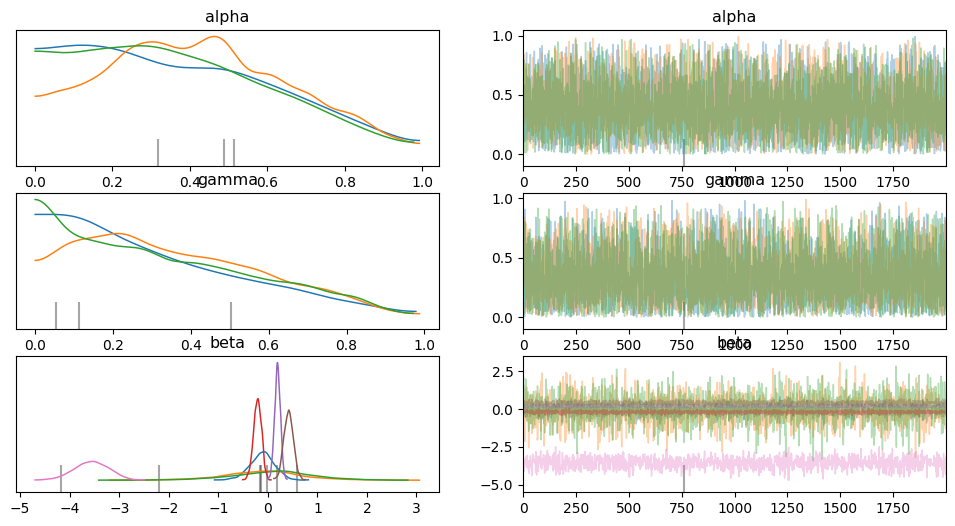

sample: 100%|██████████████████████████| 3000/3000 [00:09<00:00, 329.91it/s, 15 steps of size 2.65e-01. acc. prob=0.86]


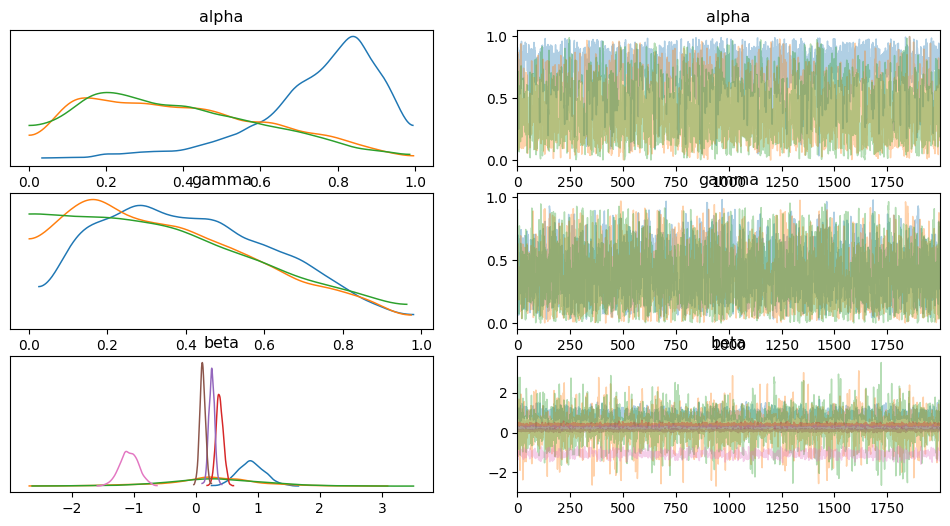

In [47]:
xmc = MediaDecomposition()
xmc.Fit(model_spec, model_data, show_traces=True)

In [5]:
res = xmc.Contributions()
res

TOM_01  COMAW_01
Total      Base       0.027381  0.255121
           Non-media  0.076969  0.169086
           tv_fr      0.000000  0.050336
           onl_fr     0.000000  0.002097
           bloger     0.000650  0.000859
           Observed   0.105000  0.477500
SEX_1      Base       0.028275  0.260857
           Non-media  0.079467  0.184338
           tv_fr      0.000000  0.051864
           onl_fr     0.000000  0.002047
           bloger     0.000592  0.000894
           Observed   0.108333  0.500000
SEX_2      Base       0.026489  0.249102
           Non-media  0.074474  0.154163
           tv_fr      0.000000  0.048770
           onl_fr     0.000000  0.002140
           bloger     0.000703  0.000824
           Observed   0.101667  0.455000
AGEBANDS_1 Base       0.020279  0.264732
           Non-media  0.055828  0.185335
           tv_fr      0.000000  0.053399
           onl_fr     0.000000  0.002186
           bloger     0.000560  0.001014
           Observed   0.076667  0.506667
AGEBANDS_2 Base       0.034286  0.245067
           Non-media  0.098366  0.153277
           tv_fr      0.000000  0.047272
           onl_fr     0.000000  0.002005
           bloger     0.000681  0.000712
           Observed   0.133333  0.448333
Region_1   Base       0.040906  0.263860
           Non-media  0.113084  0.187639
           tv_fr      0.000000  0.057910
           onl_fr     0.000000  0.002467
           bloger     0.001182  0.001055
           Observed   0.155172  0.512931
Region_2   Base       0.017603  0.235613
           Non-media  0.048023  0.116724
           tv_fr      0.000000  0.029868
           onl_fr     0.000000  0.002021
           bloger     0.000309  0.000390
           Observed   0.065934  0.384615
Region_3   Base       0.024847  0.254488
           Non-media  0.070363  0.169830
           tv_fr      0.000000  0.050581
           onl_fr     0.000000  0.002006
           bloger     0.000572  0.000860
           Observed   0.095781  0.477765

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

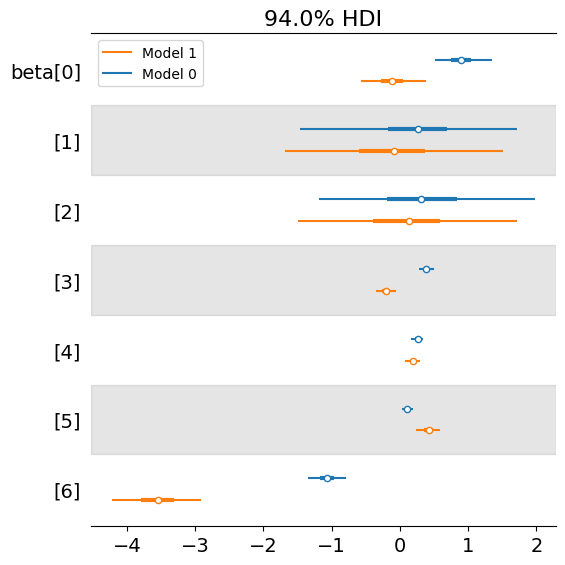

In [127]:
a1 = xmc.models['COMAW_01'].ToArviZ()
a2 = xmc.models['TOM_01'].ToArviZ()
m_dict = {'a1': a1, 'a2': a2}
az.plot_forest(list(m_dict.values()), var_names=['beta'])

# Compare spec

In [128]:
s1 = ModelSpec('zero').FromLists(
    targets=targets, 
    media=camp,
    non_media=non_camp, 
    relevance_groups=rg_vars[0],
    report_splits=None
)
s1

s2 = ModelSpec('one').FromLists(
    targets=targets, 
    media=camp,
    non_media=non_camp, 
    relevance_groups=rg_vars[1],
    report_splits=None
)
s2

{'Target variables': ['TotalUnaided_01', 'COMAW_01', 'KPIA_01', 'Consideration_Top1_BBW'], 'Media variables': ['tv_fr', 'onl_fr', 'bloger'], 'Non-media variables': ['MC2P', 'WOM2P', 'EX2P'], 'Relevance groups variable': ['Noodle_frequent_buyers'], 'Report split variables': None}

sample: 100%|██████████████████████████| 3000/3000 [00:07<00:00, 391.39it/s, 15 steps of size 2.09e-01. acc. prob=0.89]


                      rank   elpd_waic     p_waic  elpd_diff    weight  \
TotalUnaided_01 zero     0 -726.959983  11.741623   0.000000  0.903444   
TotalUnaided_01 one      1 -776.503475  11.737985  49.543492  0.096556   

                             se        dse  warning scale  
TotalUnaided_01 zero  14.056817   0.000000    False   log  
TotalUnaided_01 one   10.721547  11.030124    False   log  


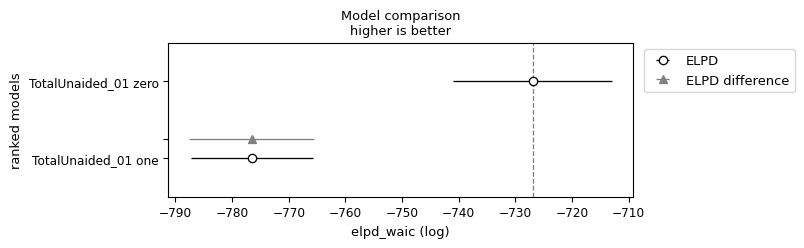

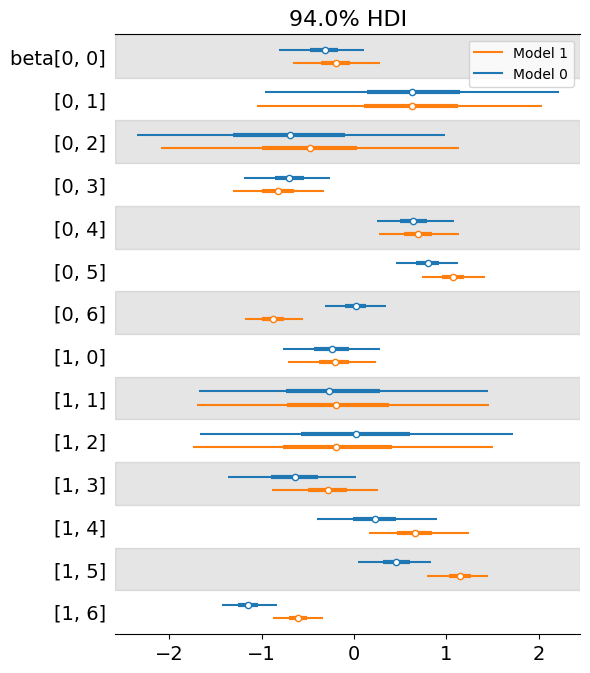

                             rank   elpd_waic     p_waic  elpd_diff    weight  \
Consideration_Top1_BBW zero     0 -536.520380  14.173353   0.000000  0.702255   
Consideration_Top1_BBW one      1 -546.400527  13.660380   9.880147  0.297745   

                                    se       dse  warning scale  
Consideration_Top1_BBW zero  18.449684  0.000000    False   log  
Consideration_Top1_BBW one   18.754664  7.281659    False   log  


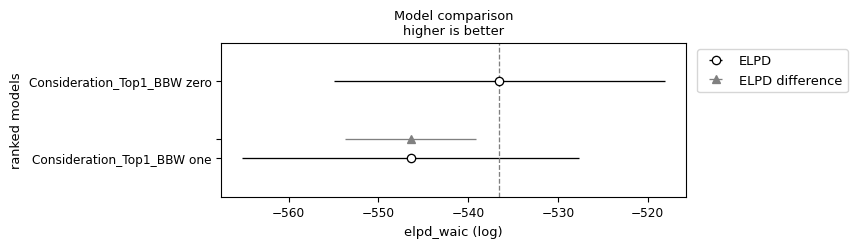

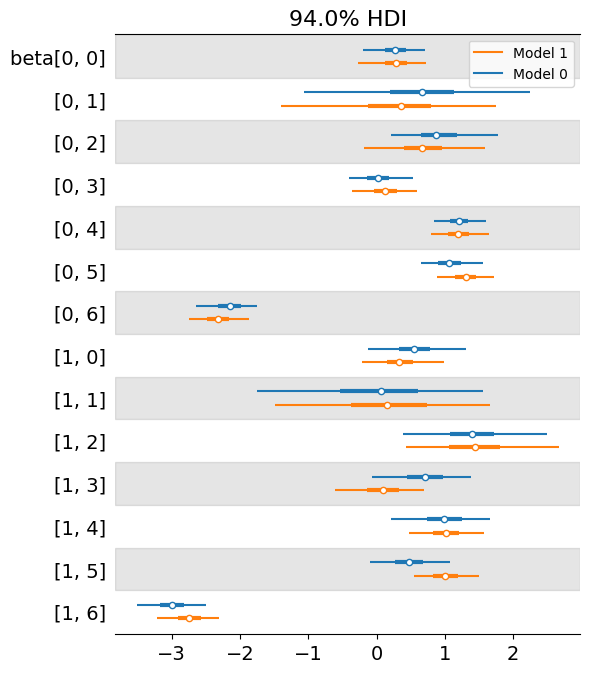

               rank   elpd_waic     p_waic  elpd_diff    weight         se  \
COMAW_01 zero     0 -756.170504  11.760874   0.000000  0.553924  11.394027   
COMAW_01 one      1 -756.930191  12.167923   0.759687  0.446076  11.400155   

                    dse  warning scale  
COMAW_01 zero  0.000000    False   log  
COMAW_01 one   3.813772    False   log  


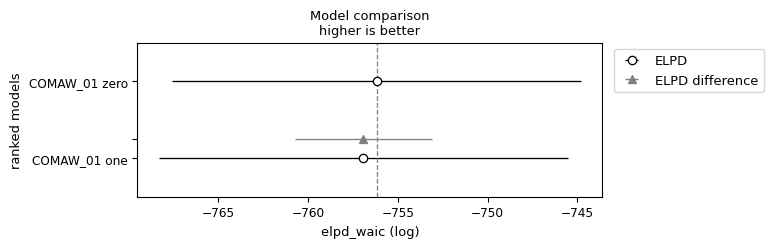

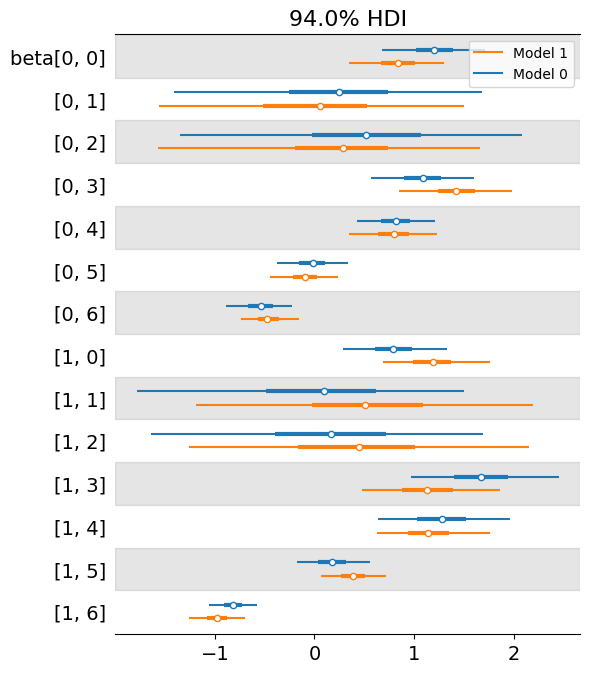

              rank   elpd_waic     p_waic  elpd_diff    weight         se  \
KPIA_01 zero     0 -674.777469  13.040795   0.000000  0.903684  16.247259   
KPIA_01 one      1 -700.129872  12.263510  25.352403  0.096316  15.155835   

                   dse  warning scale  
KPIA_01 zero  0.000000    False   log  
KPIA_01 one   7.978911    False   log  


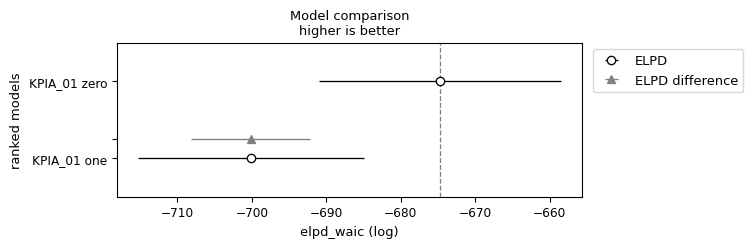

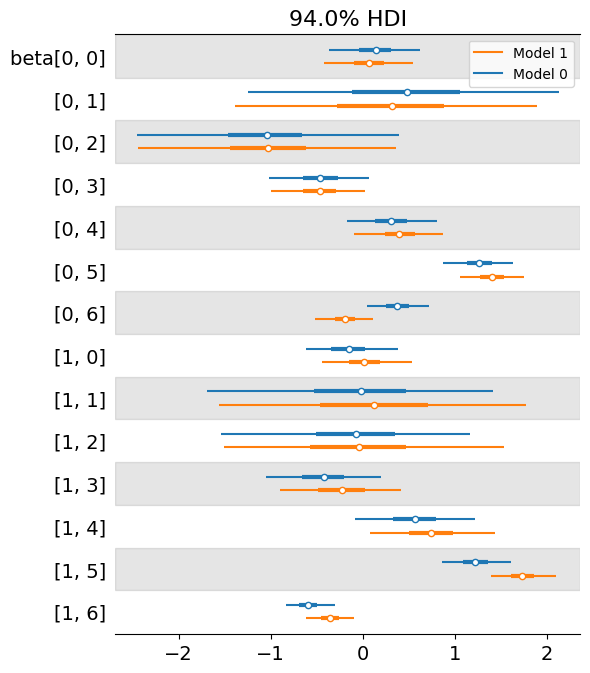

In [129]:
ModelBuildUtils().CompareSpecs([s1, s2], model_data)

# Validate RG

In [102]:
targets = ['TotalUnaided_01', 'COMAW_01', 'KPIA_01', 'Consideration_Top1_BBW'] 
camp = ['tv_fr', 'onl_fr', 'bloger'] 
non_camp = ['MC2P', 'WOM2P', 'EX2P']
rg_vars = ['BB_regular_buyers', 'Noodle_frequent_buyers', 'Noodle_Eaters']

report_splits = None


model_spec = ModelSpec().FromLists(
    targets=targets, 
    media=camp,
    non_media=non_camp, 
    relevance_groups=rg_vars,
    report_splits=report_splits
)

model_spec.ValidateSpecVsData(model_data) 

True

sample: 100%|██████████████████████████| 3000/3000 [00:07<00:00, 414.16it/s, 15 steps of size 2.45e-01. acc. prob=0.86]


                                        rank   elpd_waic     p_waic  \
TotalUnaided_01 BB_regular_buyers          0 -726.959983  11.741623   
TotalUnaided_01                            1 -776.235559   6.379207   
TotalUnaided_01 Noodle_frequent_buyers     2 -776.503475  11.737985   
TotalUnaided_01 Noodle_Eaters              3 -779.500694  11.307524   

                                        elpd_diff        weight         se  \
TotalUnaided_01 BB_regular_buyers        0.000000  9.034462e-01  14.056817   
TotalUnaided_01                         49.275577  1.529576e-14  10.445841   
TotalUnaided_01 Noodle_frequent_buyers  49.543492  9.655376e-02  10.721547   
TotalUnaided_01 Noodle_Eaters           52.540712  0.000000e+00  10.446437   

                                              dse  warning scale  
TotalUnaided_01 BB_regular_buyers        0.000000    False   log  
TotalUnaided_01                         10.415040    False   log  
TotalUnaided_01 Noodle_frequent_buyers  11.030124   

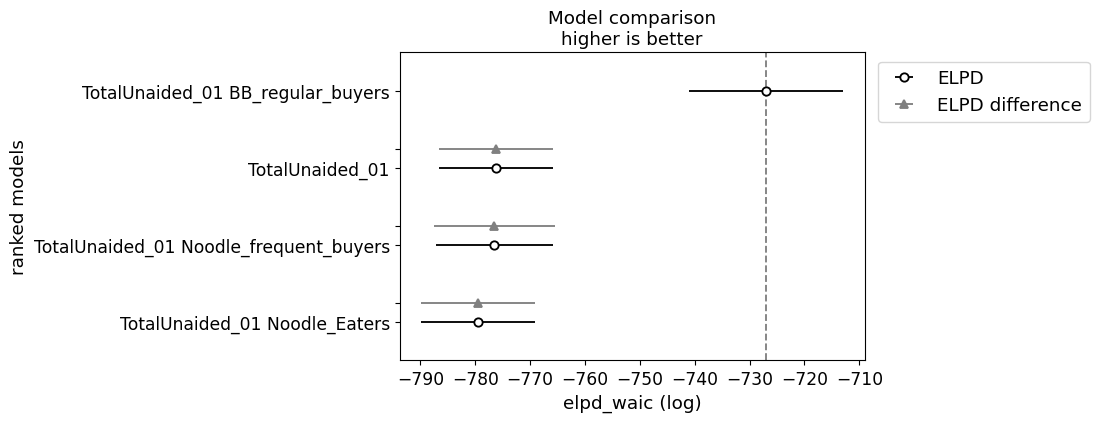

                                               rank   elpd_waic     p_waic  \
Consideration_Top1_BBW BB_regular_buyers          0 -536.520380  14.173353   
Consideration_Top1_BBW Noodle_frequent_buyers     1 -546.400527  13.660380   
Consideration_Top1_BBW Noodle_Eaters              2 -547.452666  14.282347   
Consideration_Top1_BBW                            3 -549.014477   8.157486   

                                               elpd_diff    weight         se  \
Consideration_Top1_BBW BB_regular_buyers        0.000000  0.698908  18.449684   
Consideration_Top1_BBW Noodle_frequent_buyers   9.880147  0.291471  18.754664   
Consideration_Top1_BBW Noodle_Eaters           10.932286  0.009621  18.689371   
Consideration_Top1_BBW                         12.494097  0.000000  18.720610   

                                                    dse  warning scale  
Consideration_Top1_BBW BB_regular_buyers       0.000000    False   log  
Consideration_Top1_BBW Noodle_frequent_buyers  7.281659  

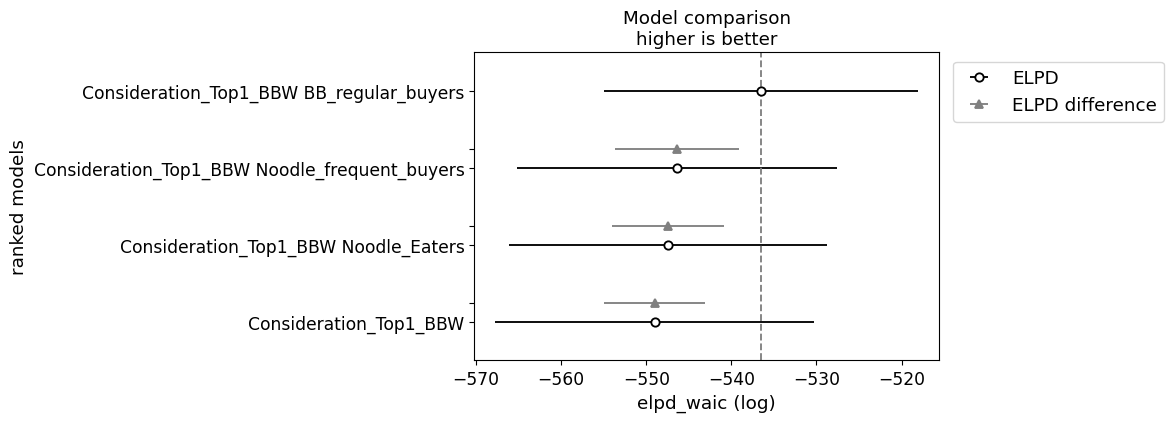

                                 rank   elpd_waic     p_waic  elpd_diff  \
COMAW_01                            0 -755.747446   7.375173   0.000000   
COMAW_01 BB_regular_buyers          1 -756.170504  11.760874   0.423058   
COMAW_01 Noodle_frequent_buyers     2 -756.930191  12.167923   1.182745   
COMAW_01 Noodle_Eaters              3 -759.149808  12.106670   3.402361   

                                   weight         se       dse  warning scale  
COMAW_01                         0.237067  11.442636  0.000000    False   log  
COMAW_01 BB_regular_buyers       0.433556  11.394027  2.726833    False   log  
COMAW_01 Noodle_frequent_buyers  0.329377  11.400155  2.761067    False   log  
COMAW_01 Noodle_Eaters           0.000000  11.282289  1.604299    False   log  


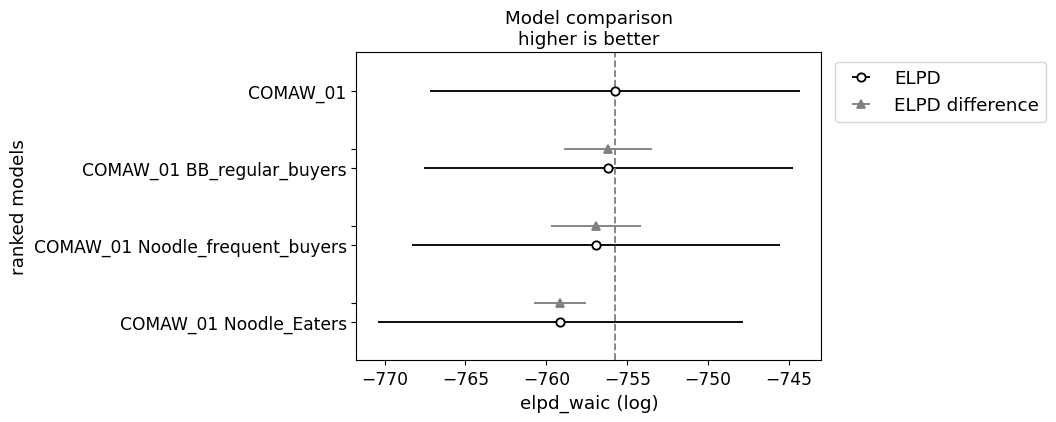

                                rank   elpd_waic     p_waic  elpd_diff  \
KPIA_01 BB_regular_buyers          0 -674.777469  13.040795   0.000000   
KPIA_01                            1 -697.458971   7.121110  22.681502   
KPIA_01 Noodle_Eaters              2 -697.796266  12.474431  23.018797   
KPIA_01 Noodle_frequent_buyers     3 -700.129872  12.263510  25.352403   

                                      weight         se       dse  warning  \
KPIA_01 BB_regular_buyers       8.817088e-01  16.247259  0.000000    False   
KPIA_01                         3.507957e-17  15.063119  7.629679    False   
KPIA_01 Noodle_Eaters           1.182912e-01  15.326325  7.790702    False   
KPIA_01 Noodle_frequent_buyers  0.000000e+00  15.155835  7.978911    False   

                               scale  
KPIA_01 BB_regular_buyers        log  
KPIA_01                          log  
KPIA_01 Noodle_Eaters            log  
KPIA_01 Noodle_frequent_buyers   log  


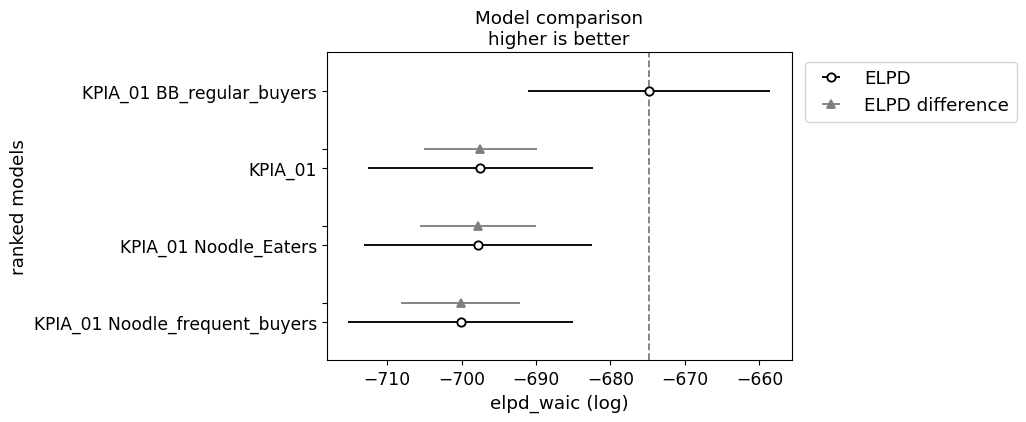

In [103]:
ModelBuildUtils().ValidateRelevanceGroups(model_spec, model_data)

# Validate Non-media

In [37]:
targets = ['TotalUnaided_01', 'COMAW_01', 'KPIA_01', 'Consideration_Top1_BBW'] 
camp = ['tv_fr', 'onl_fr', 'bloger'] 
#non_camp = ['MC2', 'WOM2', 'EX2']
#non_camp = ['ex2pbp','wom2pbp', 'mc2pbp']
non_camp = ['MC1', 'MC2', 'MC2P', 'MC2B', 'MC2N', 'WOM1', 'WOM2', 'WOM2P', 'WOM2B', 'WOM2N', 'EX1', 'EX2', 'EX2P', 'EX2B', 'EX2N']
rg_vars = None
report_splits = None

model_spec = ModelSpec().FromLists(
    targets=targets, 
    media=camp,
    non_media=non_camp, 
    relevance_groups=None,
    report_splits=None
)

print(model_spec)
model_spec.ValidateSpecVsData(model_data)

{'Target variables': ['TotalUnaided_01', 'COMAW_01'], 'Media variables': ['tv_fr', 'onl_fr', 'bloger'], 'Non-media variables': ['MC1', 'MC2', 'MC2P', 'MC2B', 'MC2N', 'WOM1', 'WOM2', 'WOM2P', 'WOM2B', 'WOM2N', 'EX1', 'EX2', 'EX2P', 'EX2B', 'EX2N'], 'Relevance groups variable': None, 'Report split variables': None}


True

In [101]:
utl = ModelBuildUtils() 
sets = utl.ValidateNonMedia(model_spec, model_data, max_variables=2)

{('EX2P',), ('WOM2P', 'EX2P'), ('WOM2P',), ('MC2P', 'WOM2P')}


  0%|                                                                                         | 0/3000 [00:02<?, ?it/s]

KeyboardInterrupt

